# Data Cleaning: Normalization
The purpose of this notebook is to describe the steps taken to clean the given dataset. It starts by normalizing any variation or meaning of the words, <font color='red'>requirement</font> and <font color='red'>process notes</font>. Such variations are deliniated in subsequent sections. Essentially, the steps involve multiple searches and manually-replaces of the variations, thus changing the content of the raw data. There are two points that worth noticing here:

1. The raw data in *Job Bulletins* remains intact while cleaned data were generated in a new folder caled *JobBulletins_cleaned*.
2. Admittedly, the steps taken here are extremely labor-intensive. However, this was done for a purpose as I learned that it is the best way to get myself familiarized with unstructured data. In particular, **since the source that generated these text file is not known**, we really have no idea on how to retrieve relevant information based on matched pattern. For example, one might attempt to do something such as `job[job.find('REQUIREMENTS/MINIMUM QUALIFICATIONS':job.find('PROCESS NOTES')]` or any similar expressions using regex. Although that this statement may help him retrieve **only** relevant information regarding school type, education majors, etc., this is not guranteed! For instance, I found that in some jobs, the word, PROCESS NOTES, came after the word WHERE TO APPLY, which unarguably causes severe headache later. The only way to avoid this, as far as I realize, is to patiently do some manual data cleaning before any analysis.

<font size=4, color='green'> LET'S GET STARTED! </font>

In [1]:
# Import relevant modules
import os                       # interface with the underlying OS
import numpy as np              # linear algebra
import pandas as pd             # dataframe
import re                       # regular expression
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

In [2]:
# Define path to look at
path = 'CityofLA/Job Bulletins/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

In [3]:
# Do some checks here
print(len(all_jobs))      # length should be 683 as manually verified
print(len(set(all_jobs))) # see if each file is unique. hopefully 683 as well!
print('SYSTEMS ANALYST 1596 102717.txt' in all_jobs) # should be True

683
683
True


## 1. Normalize variation of the word/meaning of `requirement` as 
## `REQUIREMENTS/MINIMUM QUALIFICATIONS`
Some variations that I found:
* REQUIREMENT
* REQUIREMENTS
* REQUIREMENT/ MINIMUM QUALIFICATION
* REQUIREMENT/MINIMUM QUALIFICATIONS
* REQUIREMENTS/MINIMUM QUALIFICATIONS
* REQUIREMENT:
* REQUIREMENTS:

Note that they can also come with any combination of redundant whitespaces!

Let's start with `SYSTEMS ANALYST 1596 102717.txt` to see what approach will work, since we've known so well about it.

In [4]:
# Find `SYSTEMS ANALYST 1596 102717.txt` (which exists).
print(all_jobs.index('SYSTEMS ANALYST 1596 102717.txt'))

609


In [5]:
# Import this text as string
sa_path = path + all_jobs[609]
sa = open(sa_path, 'rt').read()

In [6]:
# Compare these
print('REQUIREMENTS/MINIMUM QUALIFICATIONS' in sa)
print('REQUIREMENTS' in sa)
print()

# Versus these
print()
print('REQUIREMENTS/MINIMUM QUALIFICATIONS' in sa.split('\n'))
print('REQUIREMENTS' in sa.split('\n'))

True
True


True
False


The "Compare these" part can't do an exact lookup; <font size=5, color='red'>thus, well pick the approach in the "Versus these" part.</font>

**Identify the trouble makers, Round 1.**

Save the printouts to a word file called, *TroubleMakers_Type1_1*.

In [7]:
# When I did this at home, it has some UnicodeDecodeError (look at my physical copy)
# But when I did this from the computer at school, it didn't. Hmmm...
for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' not in job.split('\n'):
        print(job_path)

CityofLA/Job Bulletins/311 DIRECTOR  9206 041814.txt
CityofLA/Job Bulletins/ACCOUNTANT 1513 062218.txt
CityofLA/Job Bulletins/ACCOUNTING CLERK 1223 071318.txt
CityofLA/Job Bulletins/ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt
CityofLA/Job Bulletins/ADMINISTRATIVE CLERK 1358 033018 (2).txt
CityofLA/Job Bulletins/ADMINISTRATIVE HEARING EXAMINER 9135 100915.txt
CityofLA/Job Bulletins/ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 2325 020808 REV 111214.txt
CityofLA/Job Bulletins/AIR CONDITIONING MECHANIC SUPERVISOR 3781 111618 2.txt
CityofLA/Job Bulletins/AIRPORT AIDE 1540 081018.txt
CityofLA/Job Bulletins/AIRPORT CHIEF INFORMATION SECURITY OFFICER 1404 120415_Modified.txt
CityofLA/Job Bulletins/AIRPORT ENGINEER 7256 070618.txt
CityofLA/Job Bulletins/AIRPORT GUIDE 0845 042018.txt
CityofLA/Job Bulletins/AIRPORT INFORMATION SPECIALIST 1783 121115.txt
CityofLA/Job Bulletins/AIRPORT POLICE CAPTAIN 3228 021618.txt
CityofLA/Job Bulletins/AIRPORT POLICE LIEUTENANT 3227 091616.txt
CityofLA/Job Bul

CityofLA/Job Bulletins/SANITATION SOLID RESOURCES MANAGER 4126 060515.txt
CityofLA/Job Bulletins/SECRETARY 1116 030317.txt
CityofLA/Job Bulletins/SECRETARY LEGAL  1924 081718.txt
CityofLA/Job Bulletins/SECURITY AIDE  3199 090415.txt
CityofLA/Job Bulletins/SENIOR ACCOUNTANT 1523 030218.txt
CityofLA/Job Bulletins/SENIOR ADMINISTRATIVE CLERK 1368 062918 REV 091718.txt
CityofLA/Job Bulletins/SENIOR ANIMAL CONTROL OFFICER 4316 111618.txt
CityofLA/Job Bulletins/SENIOR ANIMAL KEEPER 4305 022616.txt
CityofLA/Job Bulletins/SENIOR ARCHITECTURAL DRAFTING TECHNICIAN 7208 091418.txt
CityofLA/Job Bulletins/SENIOR AUDITOR 1518 102618.txt
CityofLA/Job Bulletins/SENIOR AUTOMOTIVE SUPERVISOR 3716 112015.txt
CityofLA/Job Bulletins/SENIOR BUILDING INSPECTOR 4213 010816.txt
CityofLA/Job Bulletins/SENIOR BUILDING MECHANICAL INSPECTOR 4253 2017 REV (1).txt
CityofLA/Job Bulletins/SENIOR BUILDING OPERATING ENGINEER 5925 011615 (1).txt
CityofLA/Job Bulletins/SENIOR CARPENTER  3345 081117 REV 082417.txt
CityofLA

<font size=8>NOTE:</font>

This has been one of the weirdest things I've ever seen since learning how to program. This code runs perfectly fine on a PC (I tested it on a desktop at my school) but yields a <font color='red'>UnicdeDecodeError</font>. See this [discussion](https://stackoverflow.com/questions/33114999/python-unicodedecodeerror-on-mac-but-not-on-pc) for further detail. It basically says that there are some weird chracters in the string so Python can't read it. On a PC, it silently ignores the error, while on a Mac, it raises the error and stops the program.

Thus, an extra step to clean the data, if you're using MAC, is to detect which file causes the trouble and hopefully, you can manually fix it. Otherwise, we either have to ignore that text file or use try/except.

Let's first find what file is causing the decoding trouble.

In [8]:
# Which file Python on Mac cannot decode?
for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    try:
        job      = open(job_path, 'rt').read()
    except:
        print(job_path)

The file that causes the decoding problem is `POLICE COMMANDER 2251 092917.txt`. Upon opening this file and read through it, we'll see the culprit, rÈsumÈ. Manually find/replace this word with *resume* will fix the problem!

**Identify trouble maker, Round 2.**

Save the printouts to a word file called, *TroubleMakers_Type1_2*.

When this code first ran, there were a couple of files that I missed in Round 1 (human error during manual fix). Hence, I did it again in Round 3 and got the result I wanted.

In [9]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' not in job.split('\n'):
        print(job_path)

CityofLA/JobBulletins_cleaned/Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt


**Identify trouble makers, Round 3.**

In [10]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' not in job.split('\n'):
        print(job_path)

CityofLA/JobBulletins_cleaned/Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt


<font size=5, color='red'> Well done!</font>

Note that the job above follow a completely different format from the rest, so for now, we'll ignore it.

## 2. Normalize `PROCESS NOTES`
Some variations that were found:
* PROCESS NOTES
* PROCESS NOTES:
* NOTES
* NOTES:
* NOTE
* NOTE:
* Sometimes missing completely. Ex: `POLICE OFFICER 2214 110906 Rev 060115.txt`
* Most of the times this key come before WHERE TO APPLY, but there are ocassions it comes after. Ex: `CHIEF CLERK POLICE 1219 061215.txt`
And with no exception :(, they can come with any combination of redundant whitespaces.

In [11]:
# First, take a look at how this is done with sa
print('PROCESS NOTES' in sa.split('\n'))
print('PROCESS' in sa.split('\n'))

True
False


It seems good. Thus, we'll stick to this approach.

**Identify the trouble makers, Round 1.**

Save the printouts to a word file called, *TroubleMakers_Type2_1*.

When this code first ran, there were a couple of files that I missed in Round 1 and Round 2 (human error during manual fix). Hence, I did it again in Round 3 and got the result I wanted.

In [12]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'PROCESS NOTES' not in job.split('\n'):
        print(job_path)

CityofLA/JobBulletins_cleaned/Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt


**Identify the trouble makers, Round 2.**

Save the printouts to a word file called, *TroubleMakers_Type2_2*.

In [13]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'PROCESS NOTES' not in job.split('\n'):
        print(job_path)

CityofLA/JobBulletins_cleaned/Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt


**Identify the trouble makers, Round 2.**

In [14]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Verify if 'REQUIREMENTS/MINIMUM QUALIFICATIONS' in job
    if 'PROCESS NOTES' not in job.split('\n'):
        print(job_path)

CityofLA/JobBulletins_cleaned/Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt


<font size=5, color='red'> Well done!</font>

Again, note that the job above follow a completely different format from the rest, so for now, we'll ignore it.

## 3. Normalize the order
Most of the jobs have the following order of sections: REQUIREMENTS/MINIMUM QUALIFICATIONS, PROCESS NOTES, WHERE TO APPLY, etc. However, as mentioned in the openning of this notebook, some jobs mess this up: REQUIREMENTS/MINIMUM QUALIFICATIONS, WHERE TO APPLY, PROCESS NOTES, or any incorrect order that we don't know yet. Thus, we need to fix this.

Fortunately, we can use a histogram to plot the distributions of the length of extracted texts between REQUIREMENTS/MINIMUM QUALIFICATIONS and PROCESS NOTES. Of course, a removal of `Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt` is first needed.

In [15]:
# Remove `Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt` 
# as it doesn't share the same job description pattern of the City of LA
all_jobs.remove('Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt')

# Sanity double check
print('Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt' in all_jobs) # should be True
print(len(all_jobs)) # should be 682

False
682


In [16]:
# Histogram of length of extracted texts between two key words
length_of_extracted_txts = [] # container that holds all strings' lengths

for file_name in all_jobs:
     # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Use index, not find as a last-ditched attempt to catch any error
    txt      = job[job.index('REQUIREMENTS/MINIMUM QUALIFICATIONS'):job.index('PROCESS NOTES')]
    # Simplify txt a little bit
    txt      = (txt.replace('\n', ' ')
                   .replace(';', ' ')
                   .replace(',', ' ')
                   .replace('.', ' ')
                   .replace(')', ' ')
                   .replace('*', ' ')).split()
    # Append length to the list
    length_of_extracted_txts.append(len(txt))

# Verify if length of the list is still 682
print(len(length_of_extracted_txts))

682


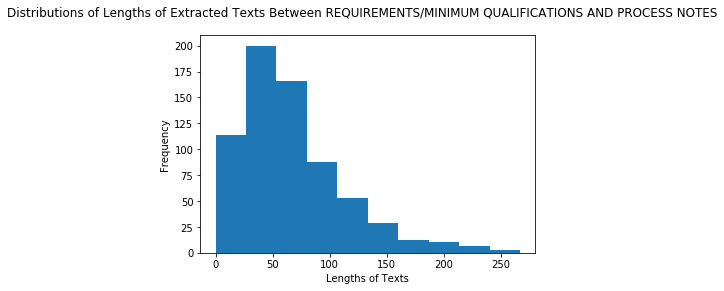

In [17]:
plt.hist(length_of_extracted_txts)
plt.suptitle('Distributions of Lengths of Extracted Texts' + 
             ' Between REQUIREMENTS/MINIMUM QUALIFICATIONS AND PROCESS NOTES')
plt.xlabel('Lengths of Texts')
plt.ylabel('Frequency')
plt.show()

Oops! Looks like we have quite a few jobs with the order of sections messed up. Now, we can use the logic described in part 1 (or 2) to catch these jobs. Let's assume that the requirement section for a job can't be greater than or equal to 150 words.

**Identify the trouble makers, Round 1.**

Save the printouts to a word file called, *TroubleMakers_Type3_1*.

In [18]:
# Catch jobs with sections' order messing up
for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Print out jobs that have more than 150 words in their requirement sections
    txt      = job[job.index('REQUIREMENTS/MINIMUM QUALIFICATIONS'):job.index('PROCESS NOTES')]
    txt      = (txt.replace('\n', ' ')
                   .replace(';', ' ')
                   .replace(',', ' ')
                   .replace('.', ' ')
                   .replace(')', ' ') # add '(' and ':' if wish
                   .replace('*', ' ')).split()
    if len(txt) >= 150:
        print(job_path)

CityofLA/JobBulletins_cleaned/311 DIRECTOR  9206 041814.txt
CityofLA/JobBulletins_cleaned/ARTS ASSOCIATE 2454 072117 REV 072817.txt
CityofLA/JobBulletins_cleaned/ARTS MANAGER 2455 092818.txt
CityofLA/JobBulletins_cleaned/ASSISTANT INSPECTOR 4208 111315.txt
CityofLA/JobBulletins_cleaned/AVIONICS SPECIALIST 3565 103114revised.txt
CityofLA/JobBulletins_cleaned/CONSTRUCTION INSPECTOR 7291 042117.txt
CityofLA/JobBulletins_cleaned/DATABASE ARCHITECT 1470 083118.txt
CityofLA/JobBulletins_cleaned/DETENTION OFFICER 3211 113018.txt
CityofLA/JobBulletins_cleaned/ELECTRIC DISTRIBUTION MECHANIC 3879 040717.txt
CityofLA/JobBulletins_cleaned/ELECTRIC STATION OPERATOR  5224 070717 (3).txt
CityofLA/JobBulletins_cleaned/ELECTRICAL CRAFT HELPER 3799 092818.txt
CityofLA/JobBulletins_cleaned/ELECTRICAL MECHANIC 3841 012017.txt
CityofLA/JobBulletins_cleaned/ELECTRICAL REPAIRER 3853 122917 updated.txt
CityofLA/JobBulletins_cleaned/EMERGENCY MANAGEMENT COORDINATOR 1702 102618.txt
CityofLA/JobBulletins_cleaned

Great, let's have a look at these ones...

Here are the found culprits:
* ENVIRONMENTAL COMPLIANCE INSPECTOR 4292 080516 REV 081616.txt
* FIRE CAPTAIN 2142 033018.txt
* GEOGRAPHIC INFORMATION SYSTEMS SUPERVISOR 7214 031717 REV 033017.txt
* STEAM PLANT ASSISTANT 5622 051118 (1).txt. This job actually had two requirements! A lookup in the actual pdf file showed that the first `REQUIREMENTS/MINIMUM QUALIFICATIONS` was a typo and it should have been `SPECIAL INFORMATION`.

Let's rerun the code in our histogram one more time, just to make sure!

682


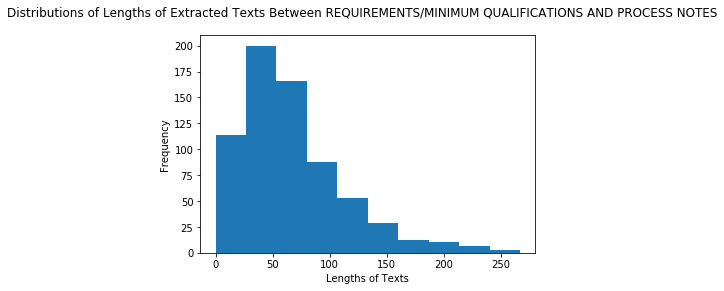

In [19]:
# Histogram of length of extracted texts between two key words
length_of_extracted_txts = [] # container that holds all strings' lengths

for file_name in all_jobs:
     # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Use index, not find as a last-ditched attempt to catch any error
    txt      = job[job.index('REQUIREMENTS/MINIMUM QUALIFICATIONS'):job.index('PROCESS NOTES')]
    # Simplify txt a little bit
    txt      = (txt.replace('\n', ' ')
                   .replace(';', ' ')
                   .replace(',', ' ')
                   .replace('.', ' ')
                   .replace(')', ' ')
                   .replace('*', ' ')).split()
    # Append length to the list
    length_of_extracted_txts.append(len(txt))

# Verify if length of the list is still 682
print(len(length_of_extracted_txts))

plt.hist(length_of_extracted_txts)
plt.suptitle('Distributions of Lengths of Extracted Texts' + 
             ' Between REQUIREMENTS/MINIMUM QUALIFICATIONS AND PROCESS NOTES')
plt.xlabel('Lengths of Texts')
plt.ylabel('Frequency')
plt.show()

While fixing files, I realized that some of the jobs have the following mess-up order: REQUIREMENTS/MINIMUM QUALIFICATIONS, SELECTIVE CERTIFICATION/WHERE TO APPLY, PROCESS NOTES. Thus, we can use this as a final check for the quality of our data by catching the jobs that have the word, SELECTIVE or WHERE, in the *extracted* text.

**Identify the trouble makers, Round 2.**

Save the printouts to a word file called, *TroubleMakers_Type3_2*.

In [20]:
# Re-catch jobs with sections' order messing up: these jobs will have the word 
for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Print out jobs that have more SELECTIVE or WHERE in the extracted text
    txt      = job[job.index('REQUIREMENTS/MINIMUM QUALIFICATIONS'):job.index('PROCESS NOTES')]
    txt      = (txt.replace('\n', ' ')
                   .replace(';', ' ')
                   .replace(',', ' ')
                   .replace('.', ' ')
                   .replace(')', ' ') # add '(' and ':' if wish
                   .replace('*', ' ')).split()
    if ('SELECTIVE' in txt) or ('WHERE' in txt):
        print(job_path)

Here's the final culprit found:
* CHIEF STREET SERVICES INVESTIGATOR 4286 2017Revised 11.21.txt

## 4. Normalize itemizers

Some jobs, such as ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt, don't have an itemizer in the front. We wish to look at them and manually add itemizers, such as 1.

**Identify the trouble makers, Round 1.**

Save the printouts to a word file called, *TroubleMakers_Type4_1*.

In [26]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    # Print out jobs that don't have itemizers in the requirement section
    txt      = job[job.index('REQUIREMENTS/MINIMUM QUALIFICATIONS'):job.index('PROCESS NOTES')]
    digits_as_str = [sentence[-1] for sentence in txt.split('.') if sentence[-1].isdigit()]
    if len(u) == 0:
        print(job_path)

CityofLA/JobBulletins_cleaned/311 DIRECTOR  9206 041814.txt
CityofLA/JobBulletins_cleaned/ACCOUNTANT 1513 062218.txt
CityofLA/JobBulletins_cleaned/ACCOUNTING CLERK 1223 071318.txt
CityofLA/JobBulletins_cleaned/ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt
CityofLA/JobBulletins_cleaned/ADMINISTRATIVE ANALYST 1590 060118.txt
CityofLA/JobBulletins_cleaned/ADMINISTRATIVE CLERK 1358 033018 (2).txt
CityofLA/JobBulletins_cleaned/ADMINISTRATIVE HEARING EXAMINER 9135 100915.txt
CityofLA/JobBulletins_cleaned/ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 2325 020808 REV 111214.txt
CityofLA/JobBulletins_cleaned/AIR CONDITIONING MECHANIC 3774 041417.txt
CityofLA/JobBulletins_cleaned/AIR CONDITIONING MECHANIC SUPERVISOR 3781 111618 2.txt
CityofLA/JobBulletins_cleaned/AIRPORT AIDE 1540 081018.txt
CityofLA/JobBulletins_cleaned/AIRPORT CHIEF INFORMATION SECURITY OFFICER 1404 120415_Modified.txt
CityofLA/JobBulletins_cleaned/AIRPORT ENGINEER 7256 070618.txt
CityofLA/JobBulletins_cleaned/AIRPORT GUIDE 0845

IndexError: string index out of range

Oops, the above code yields error <font color='red'>IndexError </font>, so let's switch to try/except.

In [33]:
# Define path to look at
path = 'CityofLA/JobBulletins_cleaned/'

# Get a list of all txt files in this path
all_jobs = os.listdir(path)
all_jobs.sort() # WARNING: this mutates the list

for file_name in all_jobs:
    # Find path
    job_path = path + file_name
    # Read in job as string based on job_path
    job      = open(job_path, 'rt').read()
    try:
        # Print out jobs that don't have itemizers in the requirement section
        txt      = job[job.index('REQUIREMENTS/MINIMUM QUALIFICATIONS'):job.index('PROCESS NOTES')]
        digits_as_str = [sentence[-1] for sentence in txt.split('.') if sentence[-1].isdigit()]
        if len(digits_as_str) == 0:
            print(job_path)
    except:
        print('##########################################################')
        print(job_path)
        print('##########################################################')

CityofLA/JobBulletins_cleaned/ACCOUNTANT 1513 062218.txt
CityofLA/JobBulletins_cleaned/ACCOUNTING CLERK 1223 071318.txt
CityofLA/JobBulletins_cleaned/ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt
CityofLA/JobBulletins_cleaned/ADMINISTRATIVE CLERK 1358 033018 (2).txt
CityofLA/JobBulletins_cleaned/AIR CONDITIONING MECHANIC SUPERVISOR 3781 111618 2.txt
CityofLA/JobBulletins_cleaned/AIRPORT AIDE 1540 081018.txt
CityofLA/JobBulletins_cleaned/AIRPORT GUIDE 0845 042018.txt
CityofLA/JobBulletins_cleaned/AIRPORT POLICE CAPTAIN 3228 021618.txt
CityofLA/JobBulletins_cleaned/AIRPORT POLICE LIEUTENANT 3227 091616.txt
CityofLA/JobBulletins_cleaned/ANIMAL CARE TECHNICIAN SUPERVISOR 4313 122118.txt
CityofLA/JobBulletins_cleaned/AQUATIC FACILITY MANAGER 2423 052915 REVISED 060915.txt
##########################################################
CityofLA/JobBulletins_cleaned/AQUEDUCT AND RESERVOIR KEEPER 5813 063017 (1).txt
##########################################################
CityofLA/JobBulletins_cl

CityofLA/JobBulletins_cleaned/PRINCIPAL MECHANICAL ENGINEERING DRAFTING TECHNICIAN 7550 081415.txt
CityofLA/JobBulletins_cleaned/PRINCIPAL PROPERTY OFFICER 3210 121517.txt
CityofLA/JobBulletins_cleaned/PRINCIPAL RECREATION SUPERVISOR 2464 021618.txt
CityofLA/JobBulletins_cleaned/PRINCIPAL SECURITY OFFICER 3200 110218.txt
CityofLA/JobBulletins_cleaned/PRINCIPAL STOREKEEPER 1839 072718.txt
CityofLA/JobBulletins_cleaned/PRINCIPAL TAX AUDITOR 1524 110416.txt
CityofLA/JobBulletins_cleaned/PRINCIPAL TAX COMPLIANCE OFFICER 1195 030218.txt
CityofLA/JobBulletins_cleaned/PRINCIPAL UTILITY ACCOUNTANT 1589 030218 updated.txt
CityofLA/JobBulletins_cleaned/PRINCIPAL WORKERS_ COMPENSATION ANALYST 1777 071814.txt
CityofLA/JobBulletins_cleaned/PROCUREMENT SUPERVISOR 1852 050517.txt
CityofLA/JobBulletins_cleaned/PROPERTY OFFICER 3207 071417 (1).txt
CityofLA/JobBulletins_cleaned/PUBLIC RELATIONS SPECIALIST 1785 012017.txt
CityofLA/JobBulletins_cleaned/RATES MANAGER 5601 012017.txt
CityofLA/JobBulletins_c

In [40]:
# Search logic

i = all_jobs.index('AQUEDUCT AND RESERVOIR KEEPER 5813 063017 (1).txt')

p = path + all_jobs[i]
j = open(p, 'rt').read()
t = j[j.index('REQUIREMENTS/MINIMUM QUALIFICATIONS'):j.index('PROCESS NOTES')]
t

'REQUIREMENTS/MINIMUM QUALIFICATIONS\n\n1. Two years of full-time paid experience with water systems facilities in construction, maintenance, or operations; or\n2. Two years of full-time paid experience operating or maintaining large irrigation systems.\n\n'

In [37]:
j.index

'AQUEDUCT AND RESERVOIR KEEPER       \nClass Code:       5813\nOpen Date:  06-30-17\n(Exam Open to All, including Current City Employees)\nANNUAL SALARY\n\n$55,415 to $68,841; $61,491 to $76,379; $64,352 to $79,949 \n\nNOTES:  \n\n1. For information regarding reciprocity between the City of Los Angeles departments and LADWP, go to http://per.lacity.org/Reciprocity_CityDepts_and_DWP.pdf.\n2. The current salary range is subject to change. You may confirm the starting salary with the hiring department before accepting a job offer.\n3. Candidates from the eligible list are normally appointed to vacancies in the lower pay grade position.\n\nDUTIES\n\nAn Aqueduct and Reservoir Keeper patrols and inspects a reservoir, a section of an aqueduct, or water shed to locate actual or potentially unsafe or unsanitary conditions; operates gates and valves as instructed to control the flow of water; monitors pressure, flow and various alarm systems; operates remote valves through electrical control pan